In [1]:
import os
import sktime
from sktime.datasets import load_from_tsfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
pretrain_data_name_lst = os.listdir('results/fcn')
pretrain_data_name_lst.remove('UAH_Driveset')
pretrain_data_name_lst.remove('UCI_HAR')
pretrain_data_name_lst.remove('PVS_Dataset')

pretrain_data_name_lst

['ArticularyWordRecognition',
 'AtrialFibrillation',
 'BasicMotions',
 'Cricket',
 'EigenWorms',
 'Epilepsy',
 'ERing',
 'EthanolConcentration',
 'FaceDetection',
 'FingerMovements',
 'HandMovementDirection',
 'Handwriting',
 'Heartbeat',
 'LSST',
 'MotorImagery',
 'NATOPS',
 'PEMS-SF',
 'PenDigits',
 'PhonemeSpectra',
 'RacketSports',
 'SelfRegulationSCP1',
 'SelfRegulationSCP2',
 'StandWalkJump',
 'UWaveGestureLibrary']

In [3]:
DATA_PATH = 'Multivariate_ts/'

####################################### Setting dataset 
option = 'name' ## 'name' or 'num'

data_name = 'StandWalkJump'
data_num = 2 
sample_num = 2 ## sample number(sequence) for each label 
#######################################


if option == 'num':
    data_name = pretrain_data_name_lst[data_num]

train_x, train_y = load_from_tsfile(
    os.path.join(DATA_PATH, "{}/{}_TRAIN.ts".format(data_name, data_name)), return_data_type="numpy3d"
)


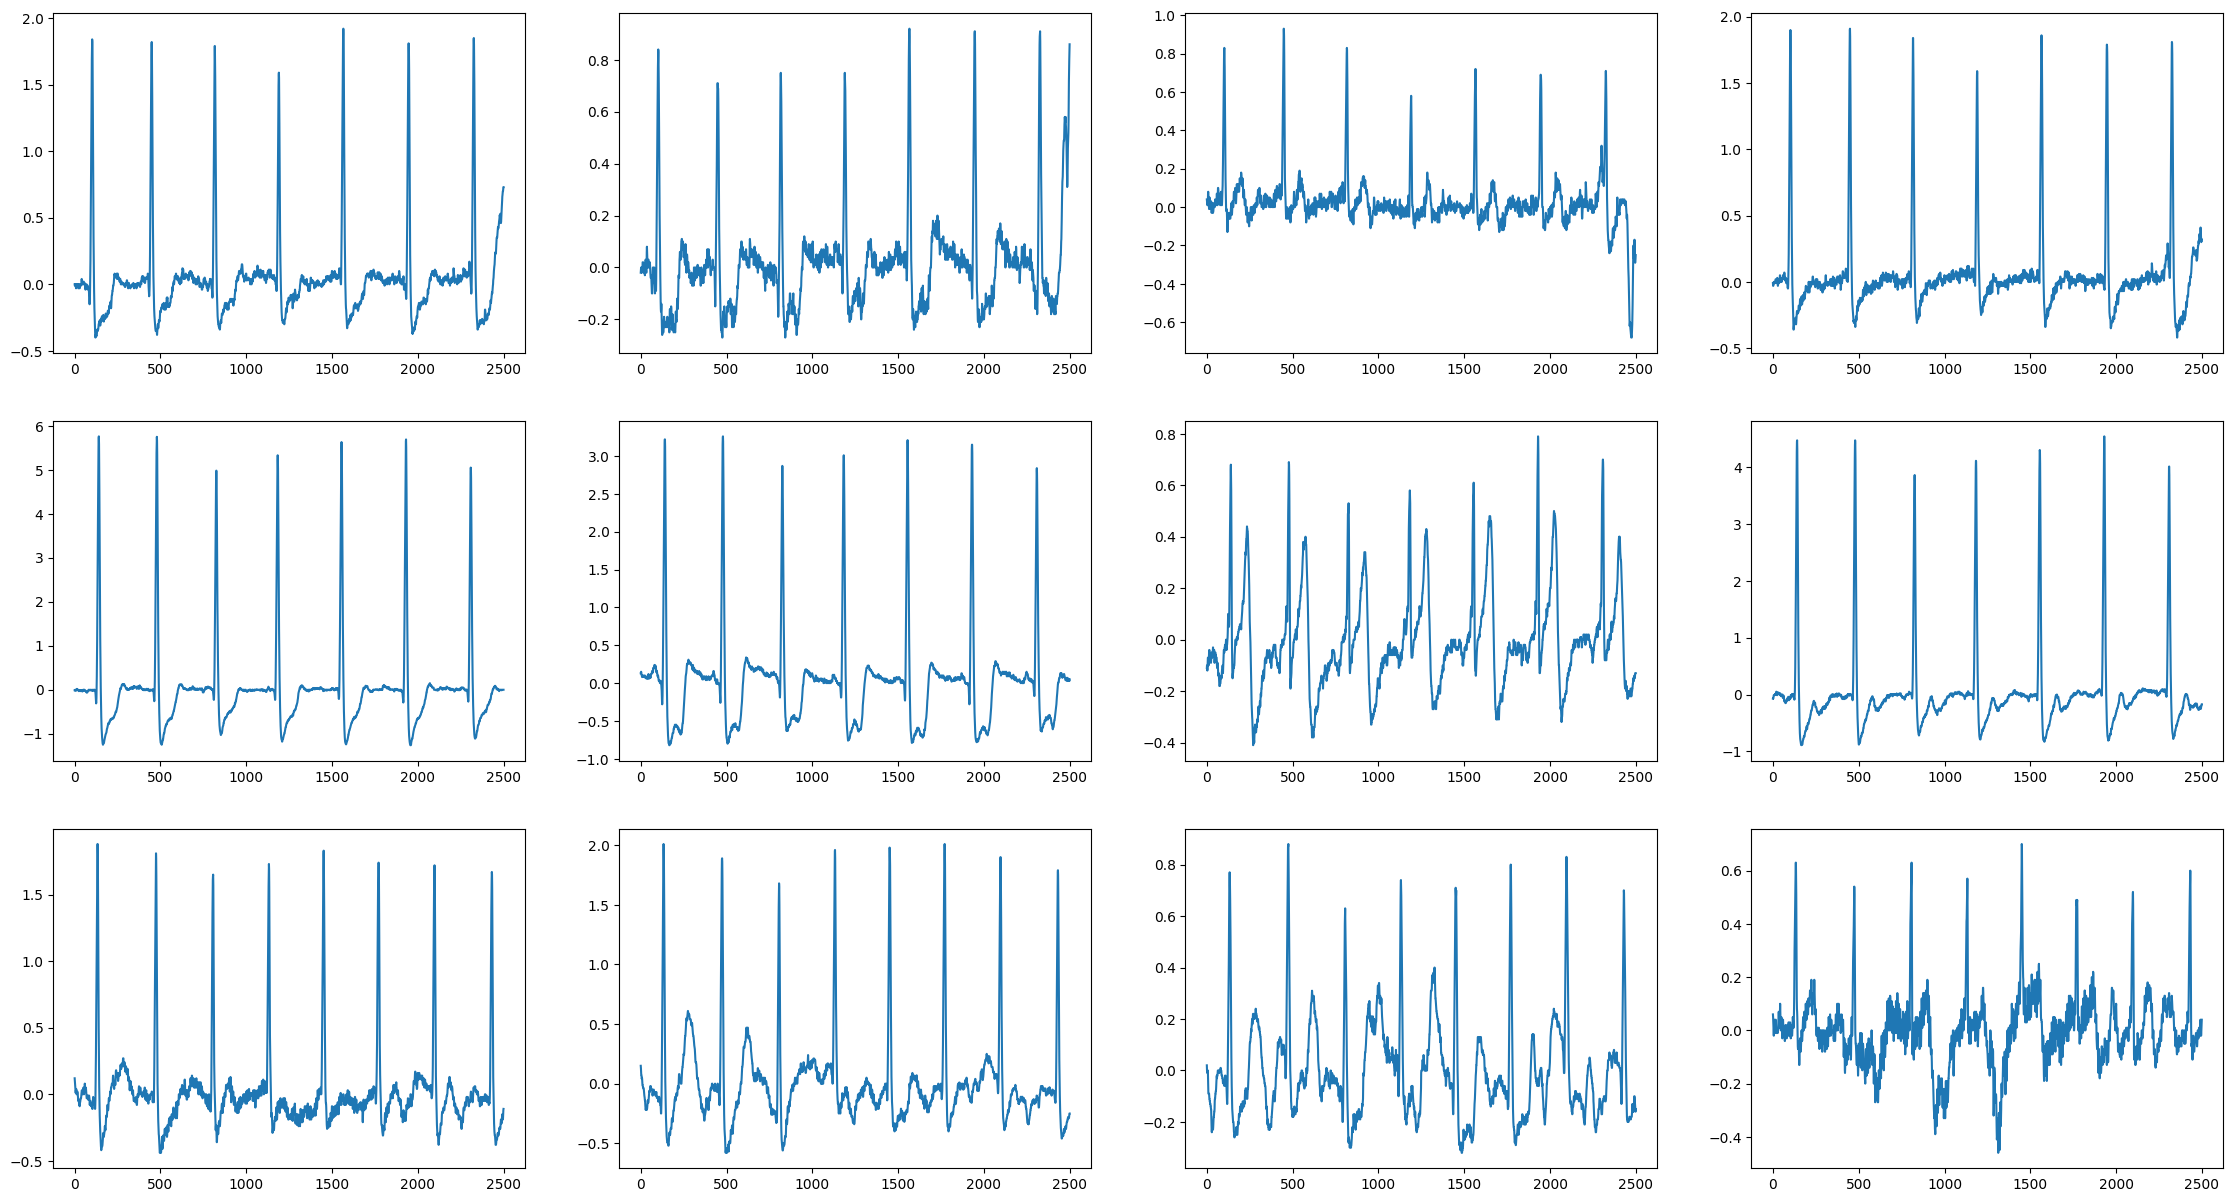

In [4]:
labels = np.unique(train_y)

data_lst = []
for label in labels:
    idx = np.where(train_y == label)[0][sample_num]
    data_lst.append(train_x[idx,:,:])

f, axes = plt.subplots(len(labels), data_lst[0].shape[0])
f.set_size_inches((7*data_lst[0].shape[0],5*len(labels)))

for i in range(len(labels)):
    data = data_lst[i]
    for j in range(data.shape[0]):
        axes[i, j].plot(data[j])

In [5]:
f.savefig('signal_shape/{}.png'.format(data_name))

In [6]:
with open('../Data/data_no_std.pkl', 'rb') as f:
     dataset = pickle.load(f)

train_X = dataset[0]
train_y = dataset[2]

sample_num = 3

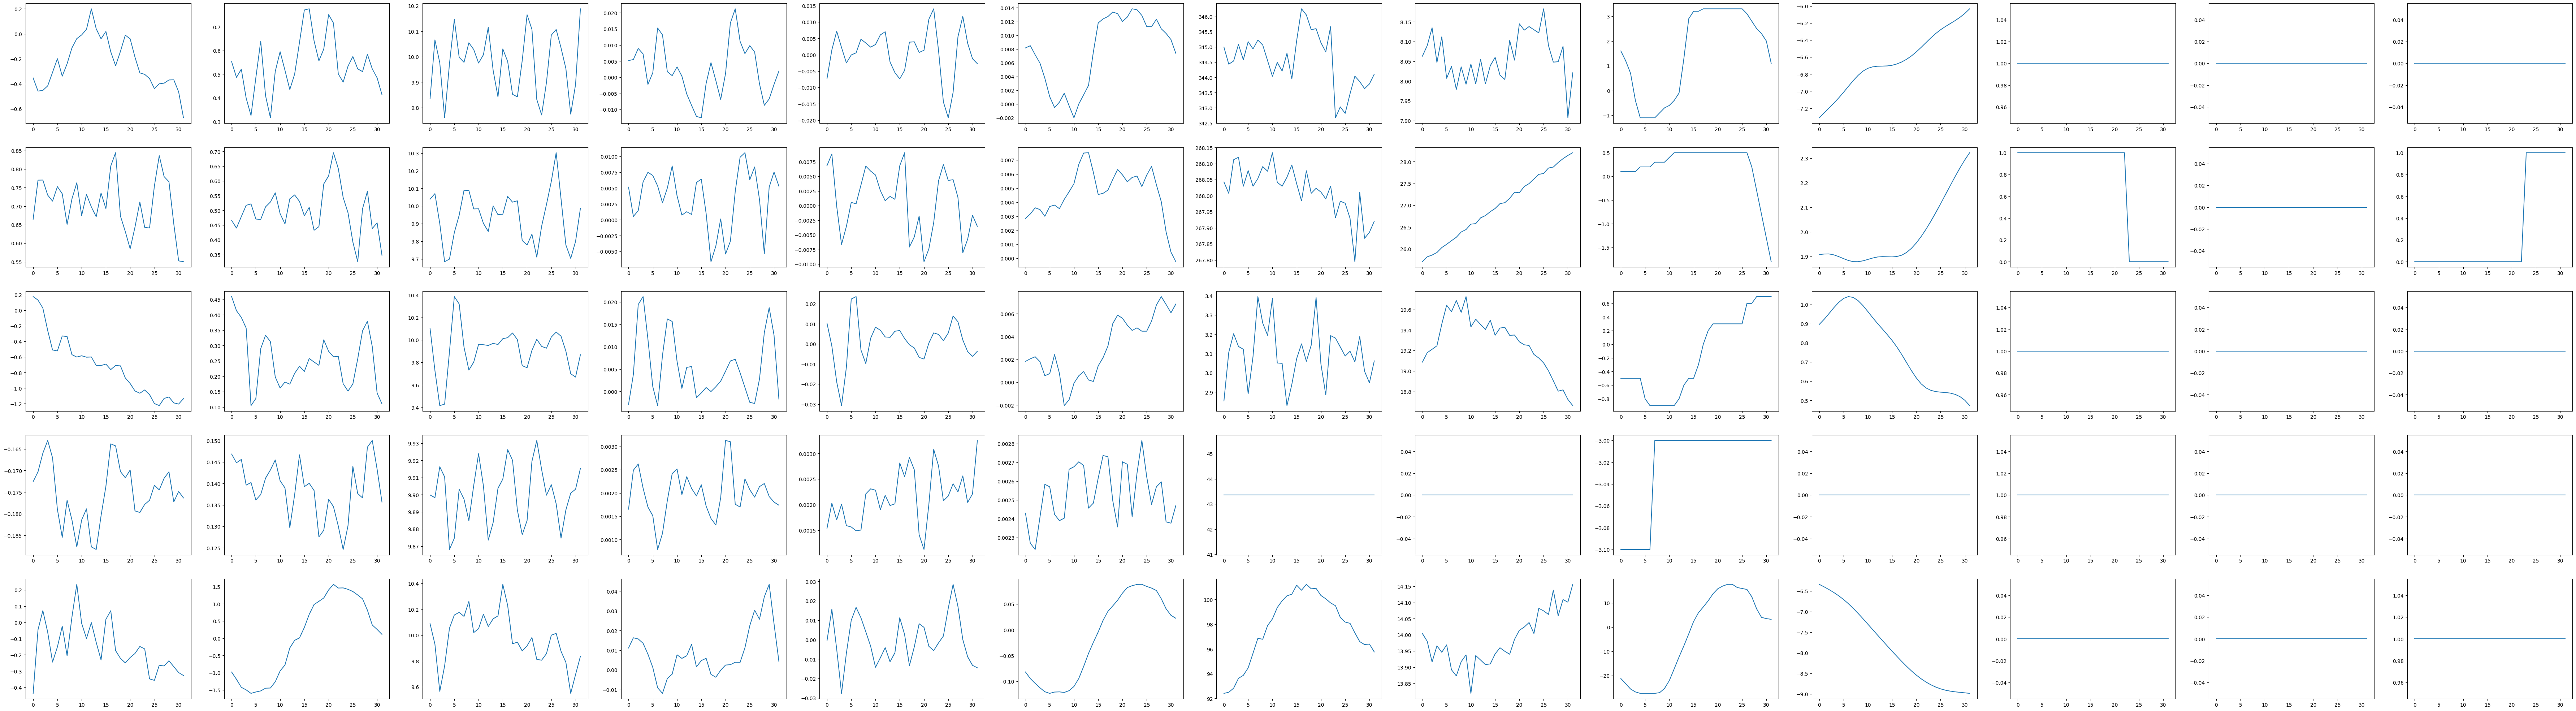

In [7]:
labels = np.unique(train_y)

data_lst = []
for label in labels:
    idx = np.where(train_y == label)[0][sample_num]
    data_lst.append(train_X[idx,:,:])

f, axes = plt.subplots(len(labels), data_lst[0].shape[1])
f.set_size_inches((7*data_lst[0].shape[1],5*len(labels)))

for i in range(len(labels)):
    data = data_lst[i]
    for j in range(data.shape[1]):
        axes[i, j].plot(data[:,j])

In [8]:
f.savefig('signal_shape/target.png')